In [3]:

import datetime

import copy

import random


from dateutil.relativedelta import relativedelta



In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
# plt.style.use('seaborn')
# plt.style.use(['dark_background', 'ggplot'])

import seaborn as sns
# sns.set()

# import scipy
# import scipy.stats as stats


# # sympy = symbolic math in Python
# import sympy as sym
# import sympy.plotting.plot as symplot


# make the equations look nicer

# from IPython.display import display
# display.set_matplotlib_formats('svg') # Deprecated since version 7.23

# import matplotlib_inline
# matplotlib_inline.backend_inline.set_matplotlib_formats('svg')


%config InlineBackend.set_matplotlib_formats = ["svg"]
%config InlineBackend.figure_formats = ["svg"]




In [5]:

import sklearn


from sklearn.model_selection import train_test_split


# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler     # <------------ (-1.0, 1.0)
# from sklearn.preprocessing import MinMaxScaler


from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error


from imblearn.over_sampling import SMOTE




In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import TensorDataset, DataLoader





torch.__version__

'1.12.0+cu113'

In [7]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)

In [8]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [147]:
def print_score(shape, yHat, y, yHat_test, yy):
    
    
    n, p = shape
    
    R2 = r2_score(y.detach().numpy(), yHat.detach().numpy())
    
    Adj_r2 = 1 - (1 - R2)  *  (n - 1) / (n - p - 1)
    
    print(f'Adjusted R-Squared(y, yHat): {Adj_r2:0.4f}\n\n')
    # r2_score(yy.detach().numpy(), yHat_test.detach().numpy())
    #  R^2 score is not well-defined with less than two samples
    
    
    print(f'mean_absolute_error(y, yHat):',
          f'{mean_absolute_error(y.detach().numpy(), yHat.detach().numpy()):0.4f}\n')
    print(f'mean_absolute_error(yy, yHat_test):',
          f'{mean_absolute_error(yy.detach().numpy(), yHat_test.detach().numpy()):0.4f}\n\n')
    
    
    print(f'mean_squared_error(y, yHat):',
          f'{mean_squared_error(y.detach().numpy(), yHat.detach().numpy()):0.4f}\n')
    print(f'mean_squared_error(yy, yHat_test):',
          f'{mean_squared_error(yy.detach().numpy(), yHat_test.detach().numpy()):0.4f}\n\n')
    
    
    print(f'mean_squared_log_error(y, yHat):',
          f'{mean_squared_log_error(y.detach().numpy(), yHat.detach().numpy()):0.4f}\n')
    print(f'mean_squared_log_error(yy, yHat_test):',
          f'{mean_squared_log_error(yy.detach().numpy(), yHat_test.detach().numpy()):0.4f}\n\n')
    
    
    
    print(f'RMSE(y, yHat):',
          f'{np.sqrt( mean_squared_error(y.detach().numpy(), yHat.detach().numpy()) ):0.4f}\n')
    print(f'RMSE(yy, yHat_test):',
          f'{np.sqrt( mean_squared_error(yy.detach().numpy(), yHat_test.detach().numpy()) ):0.4f}\n\n')
    
    
    
    
    

In [10]:
# date = np.datetime64("2000-01-01")
# date_strings = date.astype(str).split('-'). 
# # >> ['2000', '01', '01']

# year_int = int(date_strings[0])

In [11]:
!wget -nc https://raw.githubusercontent.com/Proteinea/dl-challenge-2/main/data/data.txt
!wget -nc https://raw.githubusercontent.com/Proteinea/dl-challenge-2/main/data/example_input.txt

--2022-08-04 06:44:51--  https://raw.githubusercontent.com/Proteinea/dl-challenge-2/main/data/data.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5230713 (5.0M) [text/plain]
Saving to: ‘data.txt’

data.txt            100%[===================>]   4.99M  --.-KB/s    in 0.05s   

2022-08-04 06:44:52 (103 MB/s) - ‘data.txt’ saved [5230713/5230713]

--2022-08-04 06:44:52--  https://raw.githubusercontent.com/Proteinea/dl-challenge-2/main/data/example_input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37732 (37K) [text/plain]

In [12]:
!ls

data.txt  example_input.txt  sample_data


'text.txt'

[ 1-1-1800 to 31-12-2200 ]

[day condition] [month condition] [leap year condition] [decade condition] date

[MON] [DEC] [False] [196] 3-12-1962
[THU] [DEC] [True] [204] 3-12-2048
[WED] [JAN] [False] [181] 10-1-1810

In [13]:
# data = np.loadtxt(open('text.txt','r'),delimiter=' ')
# ori = pd.read_csv('./data/data.txt', sep=' ', header=None)

ori = pd.read_csv('data.txt', sep=' ', header=None)


In [14]:
ori.columns = ['day', 'month', 'leap_year', 'decade', 'date']

In [15]:
ori

day  month leap_year decade        date
0       [WED]  [JAN]   [False]  [180]    1-1-1800
1       [THU]  [JAN]   [False]  [180]    1-1-1801
2       [FRI]  [JAN]   [False]  [180]    1-1-1802
3       [SAT]  [JAN]   [False]  [180]    1-1-1803
4       [SUN]  [JAN]    [True]  [180]    1-1-1804
...       ...    ...       ...    ...         ...
146457  [SAT]  [DEC]    [True]  [219]  31-12-2196
146458  [SUN]  [DEC]   [False]  [219]  31-12-2197
146459  [MON]  [DEC]   [False]  [219]  31-12-2198
146460  [TUE]  [DEC]   [False]  [219]  31-12-2199
146461  [WED]  [DEC]   [False]  [220]  31-12-2200

[146462 rows x 5 columns]

In [16]:
# data.date = pd.to_datetime(data.date, format='%d-%m-%Y', infer_datetime_format=False)
# # pd.to_datetime(data.date, infer_datetime_format=False)

In [17]:
ori.dtypes

day          object
month        object
leap_year    object
decade       object
date         object
dtype: object

In [18]:
# data_backup = copy.deepcopy(ori)
data = copy.deepcopy(ori)

In [19]:
data

day  month leap_year decade        date
0       [WED]  [JAN]   [False]  [180]    1-1-1800
1       [THU]  [JAN]   [False]  [180]    1-1-1801
2       [FRI]  [JAN]   [False]  [180]    1-1-1802
3       [SAT]  [JAN]   [False]  [180]    1-1-1803
4       [SUN]  [JAN]    [True]  [180]    1-1-1804
...       ...    ...       ...    ...         ...
146457  [SAT]  [DEC]    [True]  [219]  31-12-2196
146458  [SUN]  [DEC]   [False]  [219]  31-12-2197
146459  [MON]  [DEC]   [False]  [219]  31-12-2198
146460  [TUE]  [DEC]   [False]  [219]  31-12-2199
146461  [WED]  [DEC]   [False]  [220]  31-12-2200

[146462 rows x 5 columns]

In [20]:
data.date

0           1-1-1800
1           1-1-1801
2           1-1-1802
3           1-1-1803
4           1-1-1804
             ...    
146457    31-12-2196
146458    31-12-2197
146459    31-12-2198
146460    31-12-2199
146461    31-12-2200
Name: date, Length: 146462, dtype: object

In [21]:
# # data['date'] = pd.date_range('3-12-2048', periods=10)
# # data['date'] = pd.date_range('12-3-1962', periods=10)

# # 1-1-1800 to 31-12-2200
# data['date'] = pd.date_range(start='1-1-1800',end='12-31-2200')


data.date = pd.to_datetime(data.date, format='%d-%m-%Y', infer_datetime_format=False)

# # data.date = data.date.dt.strftime('%d-%m-%Y')
# # data.date = pd.to_datetime(data.date.dt.strftime('%d-%m-%Y'), format='%d-%m-%Y', infer_datetime_format=False)



In [22]:
data.dtypes

day                  object
month                object
leap_year            object
decade               object
date         datetime64[ns]
dtype: object

In [23]:
data

day  month leap_year decade       date
0       [WED]  [JAN]   [False]  [180] 1800-01-01
1       [THU]  [JAN]   [False]  [180] 1801-01-01
2       [FRI]  [JAN]   [False]  [180] 1802-01-01
3       [SAT]  [JAN]   [False]  [180] 1803-01-01
4       [SUN]  [JAN]    [True]  [180] 1804-01-01
...       ...    ...       ...    ...        ...
146457  [SAT]  [DEC]    [True]  [219] 2196-12-31
146458  [SUN]  [DEC]   [False]  [219] 2197-12-31
146459  [MON]  [DEC]   [False]  [219] 2198-12-31
146460  [TUE]  [DEC]   [False]  [219] 2199-12-31
146461  [WED]  [DEC]   [False]  [220] 2200-12-31

[146462 rows x 5 columns]

In [24]:
map_leap_year = {'[False]': int(0), '[True]' : int(1)}

data.leap_year = data.leap_year.map(map_leap_year)

# data.leap_year = data.leap_year.astype(np.float64)

In [25]:
data

day  month  leap_year decade       date
0       [WED]  [JAN]          0  [180] 1800-01-01
1       [THU]  [JAN]          0  [180] 1801-01-01
2       [FRI]  [JAN]          0  [180] 1802-01-01
3       [SAT]  [JAN]          0  [180] 1803-01-01
4       [SUN]  [JAN]          1  [180] 1804-01-01
...       ...    ...        ...    ...        ...
146457  [SAT]  [DEC]          1  [219] 2196-12-31
146458  [SUN]  [DEC]          0  [219] 2197-12-31
146459  [MON]  [DEC]          0  [219] 2198-12-31
146460  [TUE]  [DEC]          0  [219] 2199-12-31
146461  [WED]  [DEC]          0  [220] 2200-12-31

[146462 rows x 5 columns]

date -> timestamp

In [26]:
data.date.iloc[0]

Timestamp('1800-01-01 00:00:00')

In [27]:
data['date_int'] = data['date'].dt.strftime("%Y%m%d").astype(np.int64)

In [28]:
date_max = data.date_int.max()
data['date_normalized'] = data.date_int / date_max

In [29]:
data

day  month  leap_year decade       date  date_int  date_normalized
0       [WED]  [JAN]          0  [180] 1800-01-01  18000101         0.818141
1       [THU]  [JAN]          0  [180] 1801-01-01  18010101         0.818595
2       [FRI]  [JAN]          0  [180] 1802-01-01  18020101         0.819050
3       [SAT]  [JAN]          0  [180] 1803-01-01  18030101         0.819504
4       [SUN]  [JAN]          1  [180] 1804-01-01  18040101         0.819959
...       ...    ...        ...    ...        ...       ...              ...
146457  [SAT]  [DEC]          1  [219] 2196-12-31  21961231         0.998182
146458  [SUN]  [DEC]          0  [219] 2197-12-31  21971231         0.998636
146459  [MON]  [DEC]          0  [219] 2198-12-31  21981231         0.999091
146460  [TUE]  [DEC]          0  [219] 2199-12-31  21991231         0.999545
146461  [WED]  [DEC]          0  [220] 2200-12-31  22001231         1.000000

[146462 rows x 7 columns]

In [30]:
x = data.decade.iloc[0]
x

'[180]'

In [31]:
x.strip('[]')

'180'

In [32]:
data.decade = data.decade.apply(lambda x: x.strip('[]')).astype('int64')

In [33]:
# data.day = data.day.apply(lambda x: x.strip('[]'))
# data.month = data.month.apply(lambda x: x.strip('[]'))

In [34]:
map_day = {'[SAT]': int(0),
           '[SUN]': int(1),
           '[MON]': int(2),
           '[TUE]': int(3),
           '[WED]': int(4),
           '[THU]': int(5),
           '[FRI]': int(6)}

In [35]:
data['day_code'] = data.day.map(map_day)

In [36]:
scaler_day = RobustScaler()

x = data.day_code.values.reshape(-1, 1)

data['day_scaled'] = scaler_day.fit_transform(x).flatten()


In [37]:
data

day  month  leap_year  decade       date  date_int  date_normalized  \
0       [WED]  [JAN]          0     180 1800-01-01  18000101         0.818141   
1       [THU]  [JAN]          0     180 1801-01-01  18010101         0.818595   
2       [FRI]  [JAN]          0     180 1802-01-01  18020101         0.819050   
3       [SAT]  [JAN]          0     180 1803-01-01  18030101         0.819504   
4       [SUN]  [JAN]          1     180 1804-01-01  18040101         0.819959   
...       ...    ...        ...     ...        ...       ...              ...   
146457  [SAT]  [DEC]          1     219 2196-12-31  21961231         0.998182   
146458  [SUN]  [DEC]          0     219 2197-12-31  21971231         0.998636   
146459  [MON]  [DEC]          0     219 2198-12-31  21981231         0.999091   
146460  [TUE]  [DEC]          0     219 2199-12-31  21991231         0.999545   
146461  [WED]  [DEC]          0     220 2200-12-31  22001231         1.000000   

        day_code  day_scaled  
0              4        0.25  
1              5        0.50  
2              6        0.75  
3              0       -0.75  
4              1       -0.50  
...          ...         ...  
146457         0       -0.75  
146458         1       -0.50  
146459         2       -0.25  
146460         3        0.00  
146461         4        0.25  

[146462 rows x 9 columns]

In [38]:
data['day_sin'] = np.sin(data['day_code'] * (2 * np.pi / 7))
data['day_cos'] = np.cos(data['day_code'] * (2 * np.pi / 7))

In [39]:
data

day  month  leap_year  decade       date  date_int  date_normalized  \
0       [WED]  [JAN]          0     180 1800-01-01  18000101         0.818141   
1       [THU]  [JAN]          0     180 1801-01-01  18010101         0.818595   
2       [FRI]  [JAN]          0     180 1802-01-01  18020101         0.819050   
3       [SAT]  [JAN]          0     180 1803-01-01  18030101         0.819504   
4       [SUN]  [JAN]          1     180 1804-01-01  18040101         0.819959   
...       ...    ...        ...     ...        ...       ...              ...   
146457  [SAT]  [DEC]          1     219 2196-12-31  21961231         0.998182   
146458  [SUN]  [DEC]          0     219 2197-12-31  21971231         0.998636   
146459  [MON]  [DEC]          0     219 2198-12-31  21981231         0.999091   
146460  [TUE]  [DEC]          0     219 2199-12-31  21991231         0.999545   
146461  [WED]  [DEC]          0     220 2200-12-31  22001231         1.000000   

        day_code  day_scaled   day_sin   day_cos  
0              4        0.25 -0.433884 -0.900969  
1              5        0.50 -0.974928 -0.222521  
2              6        0.75 -0.781831  0.623490  
3              0       -0.75  0.000000  1.000000  
4              1       -0.50  0.781831  0.623490  
...          ...         ...       ...       ...  
146457         0       -0.75  0.000000  1.000000  
146458         1       -0.50  0.781831  0.623490  
146459         2       -0.25  0.974928 -0.222521  
146460         3        0.00  0.433884 -0.900969  
146461         4        0.25 -0.433884 -0.900969  

[146462 rows x 11 columns]

In [40]:
map_month = {'[JAN]' : 0,
             '[FEB]' : 1,
             '[MAR]' : 2,
             '[APR]' : 3,
             '[MAY]' : 4,
             '[JUN]' : 5,
             '[JUL]' : 6,
             '[AUG]' : 7,
             '[SEP]' : 8,
             '[OCT]' : 9,
             '[NOV]' : 10,
             '[DEC]' : 11}

In [41]:
data['month_code'] = data.month.map(map_month)

In [42]:
scaler_month = RobustScaler()

x = data.month_code.values.reshape(-1, 1)

data['month_scaled'] = scaler_month.fit_transform(x).flatten()


In [43]:
data['month_sin'] = np.sin(data['month_code'] * (2 * np.pi / 12))
data['month_cos'] = np.cos(data['month_code'] * (2 * np.pi / 12))

In [44]:
data

day  month  leap_year  decade       date  date_int  date_normalized  \
0       [WED]  [JAN]          0     180 1800-01-01  18000101         0.818141   
1       [THU]  [JAN]          0     180 1801-01-01  18010101         0.818595   
2       [FRI]  [JAN]          0     180 1802-01-01  18020101         0.819050   
3       [SAT]  [JAN]          0     180 1803-01-01  18030101         0.819504   
4       [SUN]  [JAN]          1     180 1804-01-01  18040101         0.819959   
...       ...    ...        ...     ...        ...       ...              ...   
146457  [SAT]  [DEC]          1     219 2196-12-31  21961231         0.998182   
146458  [SUN]  [DEC]          0     219 2197-12-31  21971231         0.998636   
146459  [MON]  [DEC]          0     219 2198-12-31  21981231         0.999091   
146460  [TUE]  [DEC]          0     219 2199-12-31  21991231         0.999545   
146461  [WED]  [DEC]          0     220 2200-12-31  22001231         1.000000   

        day_code  day_scaled   day_sin   day_cos  month_code  month_scaled  \
0              4        0.25 -0.433884 -0.900969           0     -1.000000   
1              5        0.50 -0.974928 -0.222521           0     -1.000000   
2              6        0.75 -0.781831  0.623490           0     -1.000000   
3              0       -0.75  0.000000  1.000000           0     -1.000000   
4              1       -0.50  0.781831  0.623490           0     -1.000000   
...          ...         ...       ...       ...         ...           ...   
146457         0       -0.75  0.000000  1.000000          11      0.833333   
146458         1       -0.50  0.781831  0.623490          11      0.833333   
146459         2       -0.25  0.974928 -0.222521          11      0.833333   
146460         3        0.00  0.433884 -0.900969          11      0.833333   
146461         4        0.25 -0.433884 -0.900969          11      0.833333   

        month_sin  month_cos  
0             0.0   1.000000  
1             0.0   1.000000  
2             0.0   1.000000  
3             0.0   1.000000  
4             0.0   1.000000  
...           ...        ...  
146457       -0.5   0.866025  
146458       -0.5   0.866025  
146459       -0.5   0.866025  
146460       -0.5   0.866025  
146461       -0.5   0.866025  

[146462 rows x 15 columns]

In [45]:
scaler_decade = RobustScaler()

x = data.decade.values.reshape(-1, 1)

data['decade_scaled'] = scaler_decade.fit_transform(x).flatten()


In [46]:
# alpha = len(data.decade.unique())
alpha = (data.decade.iloc[-1] - data.decade.iloc[0]) + 1

data['decade_sin'] = np.sin(data['decade'] * (2 * np.pi / alpha))
data['decade_cos'] = np.cos(data['decade'] * (2 * np.pi / alpha))

In [47]:
data

day  month  leap_year  decade       date  date_int  date_normalized  \
0       [WED]  [JAN]          0     180 1800-01-01  18000101         0.818141   
1       [THU]  [JAN]          0     180 1801-01-01  18010101         0.818595   
2       [FRI]  [JAN]          0     180 1802-01-01  18020101         0.819050   
3       [SAT]  [JAN]          0     180 1803-01-01  18030101         0.819504   
4       [SUN]  [JAN]          1     180 1804-01-01  18040101         0.819959   
...       ...    ...        ...     ...        ...       ...              ...   
146457  [SAT]  [DEC]          1     219 2196-12-31  21961231         0.998182   
146458  [SUN]  [DEC]          0     219 2197-12-31  21971231         0.998636   
146459  [MON]  [DEC]          0     219 2198-12-31  21981231         0.999091   
146460  [TUE]  [DEC]          0     219 2199-12-31  21991231         0.999545   
146461  [WED]  [DEC]          0     220 2200-12-31  22001231         1.000000   

        day_code  day_scaled   day_sin   day_cos  month_code  month_scaled  \
0              4        0.25 -0.433884 -0.900969           0     -1.000000   
1              5        0.50 -0.974928 -0.222521           0     -1.000000   
2              6        0.75 -0.781831  0.623490           0     -1.000000   
3              0       -0.75  0.000000  1.000000           0     -1.000000   
4              1       -0.50  0.781831  0.623490           0     -1.000000   
...          ...         ...       ...       ...         ...           ...   
146457         0       -0.75  0.000000  1.000000          11      0.833333   
146458         1       -0.50  0.781831  0.623490          11      0.833333   
146459         2       -0.25  0.974928 -0.222521          11      0.833333   
146460         3        0.00  0.433884 -0.900969          11      0.833333   
146461         4        0.25 -0.433884 -0.900969          11      0.833333   

        month_sin  month_cos  decade_scaled  decade_sin  decade_cos  
0             0.0   1.000000          -1.00    0.636242   -0.771489  
1             0.0   1.000000          -1.00    0.636242   -0.771489  
2             0.0   1.000000          -1.00    0.636242   -0.771489  
3             0.0   1.000000          -1.00    0.636242   -0.771489  
4             0.0   1.000000          -1.00    0.636242   -0.771489  
...           ...        ...            ...         ...         ...  
146457       -0.5   0.866025           0.95    0.839365   -0.543568  
146458       -0.5   0.866025           0.95    0.839365   -0.543568  
146459       -0.5   0.866025           0.95    0.839365   -0.543568  
146460       -0.5   0.866025           0.95    0.839365   -0.543568  
146461       -0.5   0.866025           1.00    0.746553   -0.665326  

[146462 rows x 18 columns]

In [48]:
data.dtypes

day                        object
month                      object
leap_year                   int64
decade                      int64
date               datetime64[ns]
date_int                    int64
date_normalized           float64
day_code                    int64
day_scaled                float64
day_sin                   float64
day_cos                   float64
month_code                  int64
month_scaled              float64
month_sin                 float64
month_cos                 float64
decade_scaled             float64
decade_sin                float64
decade_cos                float64
dtype: object

In [49]:
data.date_normalized.min(), data.date_normalized.max()

(0.8181406304038169, 1.0)

In [50]:
round(data.date_normalized.min()), round(data.date_normalized.max())

(1, 1)

In [51]:
round(data.day_scaled.min()), round(data.day_scaled.max())

(-1, 1)

In [52]:
round(data.day_sin.min()), round(data.day_sin.max())

(-1, 1)

In [53]:
round(data.day_cos.min()), round(data.day_cos.max())

(-1, 1)

In [54]:
round(data.month_scaled.min()), round(data.month_scaled.max())

(-1, 1)

In [55]:
round(data.month_sin.min()), round(data.month_sin.max())

(-1, 1)

In [56]:
round(data.month_cos.min()), round(data.month_cos.max())

(-1, 1)

In [57]:
data.leap_year.min(), data.leap_year.max()

(0, 1)

In [58]:
round(data.decade_scaled.min()), round(data.decade_scaled.max())

(-1, 1)

In [59]:
round(data.decade_sin.min()), round(data.decade_sin.max())

(-1, 1)

In [60]:
round(data.decade_cos.min()), round(data.decade_cos.max())

(-1, 1)

Boxplot

In [200]:
fig,ax = plt.subplots(1,figsize=(17,4))

ax = sns.boxplot(data=data[['day_scaled', 'day_sin', 'day_cos', 'month_scaled', 'month_sin', 'month_cos', 
          'leap_year', 'decade_scaled', 'decade_sin', 'decade_cos']])

ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

In [62]:
data

day  month  leap_year  decade       date  date_int  date_normalized  \
0       [WED]  [JAN]          0     180 1800-01-01  18000101         0.818141   
1       [THU]  [JAN]          0     180 1801-01-01  18010101         0.818595   
2       [FRI]  [JAN]          0     180 1802-01-01  18020101         0.819050   
3       [SAT]  [JAN]          0     180 1803-01-01  18030101         0.819504   
4       [SUN]  [JAN]          1     180 1804-01-01  18040101         0.819959   
...       ...    ...        ...     ...        ...       ...              ...   
146457  [SAT]  [DEC]          1     219 2196-12-31  21961231         0.998182   
146458  [SUN]  [DEC]          0     219 2197-12-31  21971231         0.998636   
146459  [MON]  [DEC]          0     219 2198-12-31  21981231         0.999091   
146460  [TUE]  [DEC]          0     219 2199-12-31  21991231         0.999545   
146461  [WED]  [DEC]          0     220 2200-12-31  22001231         1.000000   

        day_code  day_scaled   day_sin   day_cos  month_code  month_scaled  \
0              4        0.25 -0.433884 -0.900969           0     -1.000000   
1              5        0.50 -0.974928 -0.222521           0     -1.000000   
2              6        0.75 -0.781831  0.623490           0     -1.000000   
3              0       -0.75  0.000000  1.000000           0     -1.000000   
4              1       -0.50  0.781831  0.623490           0     -1.000000   
...          ...         ...       ...       ...         ...           ...   
146457         0       -0.75  0.000000  1.000000          11      0.833333   
146458         1       -0.50  0.781831  0.623490          11      0.833333   
146459         2       -0.25  0.974928 -0.222521          11      0.833333   
146460         3        0.00  0.433884 -0.900969          11      0.833333   
146461         4        0.25 -0.433884 -0.900969          11      0.833333   

        month_sin  month_cos  decade_scaled  decade_sin  decade_cos  
0             0.0   1.000000          -1.00    0.636242   -0.771489  
1             0.0   1.000000          -1.00    0.636242   -0.771489  
2             0.0   1.000000          -1.00    0.636242   -0.771489  
3             0.0   1.000000          -1.00    0.636242   -0.771489  
4             0.0   1.000000          -1.00    0.636242   -0.771489  
...           ...        ...            ...         ...         ...  
146457       -0.5   0.866025           0.95    0.839365   -0.543568  
146458       -0.5   0.866025           0.95    0.839365   -0.543568  
146459       -0.5   0.866025           0.95    0.839365   -0.543568  
146460       -0.5   0.866025           0.95    0.839365   -0.543568  
146461       -0.5   0.866025           1.00    0.746553   -0.665326  

[146462 rows x 18 columns]

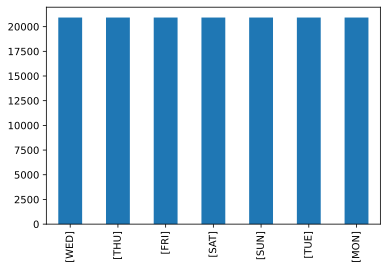

In [63]:
data.day.value_counts().plot(kind="bar")

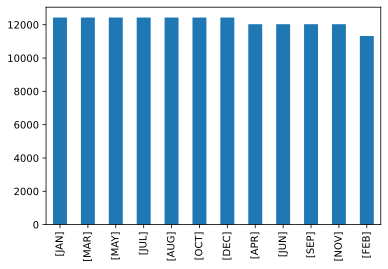

In [64]:
data.month.value_counts().plot(kind="bar")

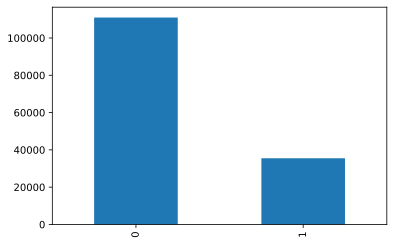

In [65]:
data.leap_year.value_counts().plot(kind="bar")

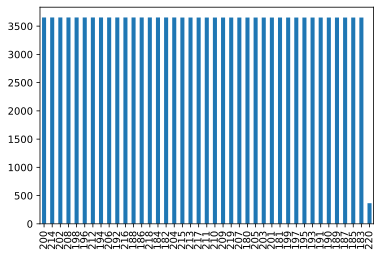

In [66]:
data.decade.value_counts().plot(kind="bar")

In [67]:
data

day  month  leap_year  decade       date  date_int  date_normalized  \
0       [WED]  [JAN]          0     180 1800-01-01  18000101         0.818141   
1       [THU]  [JAN]          0     180 1801-01-01  18010101         0.818595   
2       [FRI]  [JAN]          0     180 1802-01-01  18020101         0.819050   
3       [SAT]  [JAN]          0     180 1803-01-01  18030101         0.819504   
4       [SUN]  [JAN]          1     180 1804-01-01  18040101         0.819959   
...       ...    ...        ...     ...        ...       ...              ...   
146457  [SAT]  [DEC]          1     219 2196-12-31  21961231         0.998182   
146458  [SUN]  [DEC]          0     219 2197-12-31  21971231         0.998636   
146459  [MON]  [DEC]          0     219 2198-12-31  21981231         0.999091   
146460  [TUE]  [DEC]          0     219 2199-12-31  21991231         0.999545   
146461  [WED]  [DEC]          0     220 2200-12-31  22001231         1.000000   

        day_code  day_scaled   day_sin   day_cos  month_code  month_scaled  \
0              4        0.25 -0.433884 -0.900969           0     -1.000000   
1              5        0.50 -0.974928 -0.222521           0     -1.000000   
2              6        0.75 -0.781831  0.623490           0     -1.000000   
3              0       -0.75  0.000000  1.000000           0     -1.000000   
4              1       -0.50  0.781831  0.623490           0     -1.000000   
...          ...         ...       ...       ...         ...           ...   
146457         0       -0.75  0.000000  1.000000          11      0.833333   
146458         1       -0.50  0.781831  0.623490          11      0.833333   
146459         2       -0.25  0.974928 -0.222521          11      0.833333   
146460         3        0.00  0.433884 -0.900969          11      0.833333   
146461         4        0.25 -0.433884 -0.900969          11      0.833333   

        month_sin  month_cos  decade_scaled  decade_sin  decade_cos  
0             0.0   1.000000          -1.00    0.636242   -0.771489  
1             0.0   1.000000          -1.00    0.636242   -0.771489  
2             0.0   1.000000          -1.00    0.636242   -0.771489  
3             0.0   1.000000          -1.00    0.636242   -0.771489  
4             0.0   1.000000          -1.00    0.636242   -0.771489  
...           ...        ...            ...         ...         ...  
146457       -0.5   0.866025           0.95    0.839365   -0.543568  
146458       -0.5   0.866025           0.95    0.839365   -0.543568  
146459       -0.5   0.866025           0.95    0.839365   -0.543568  
146460       -0.5   0.866025           0.95    0.839365   -0.543568  
146461       -0.5   0.866025           1.00    0.746553   -0.665326  

[146462 rows x 18 columns]

In [68]:
data.dtypes

day                        object
month                      object
leap_year                   int64
decade                      int64
date               datetime64[ns]
date_int                    int64
date_normalized           float64
day_code                    int64
day_scaled                float64
day_sin                   float64
day_cos                   float64
month_code                  int64
month_scaled              float64
month_sin                 float64
month_cos                 float64
decade_scaled             float64
decade_sin                float64
decade_cos                float64
dtype: object

['day_sin', 'day_cos', 'month_sin', 'month_cos', 'leap_year', 'decade_scaled']
['date_timestamp_scaled']

In [69]:
X = data[['day_scaled', 'day_sin', 'day_cos', 'month_scaled', 'month_sin', 'month_cos', 
          'leap_year', 'decade_scaled', 'decade_sin', 'decade_cos']].values
X

array([[ 0.25      , -0.43388374, -0.90096887, ..., -1.        ,
         0.63624244, -0.77148918],
       [ 0.5       , -0.97492791, -0.22252093, ..., -1.        ,
         0.63624244, -0.77148918],
       [ 0.75      , -0.78183148,  0.6234898 , ..., -1.        ,
         0.63624244, -0.77148918],
       ...,
       [-0.25      ,  0.97492791, -0.22252093, ...,  0.95      ,
         0.83936543, -0.54356755],
       [ 0.        ,  0.43388374, -0.90096887, ...,  0.95      ,
         0.83936543, -0.54356755],
       [ 0.25      , -0.43388374, -0.90096887, ...,  1.        ,
         0.74655322, -0.6653257 ]])

In [70]:
len(X)

146462

In [71]:
X.shape

(146462, 10)

In [72]:
# Y = data['date_int'].values.reshape(-1, 1)
# Y = np.log(data['date_int'].values.reshape(-1, 1))
# Y = data['date_int'].values.reshape(-1, 1) / data['date_int'].max()
Y = data['date_normalized'].values.reshape(-1, 1)


Y

array([[0.81814063],
       [0.81859515],
       [0.81904967],
       ...,
       [0.99909096],
       [0.99954548],
       [1.        ]])

In [73]:
len(Y)

146462

In [74]:
Y.shape

(146462, 1)

In [75]:
# # leap = np.where(~X['leap_year'] == 1)[0]
# leap = np.where(X['leap_year'] == 1)[0]

# leap

In [76]:
train_data, test_data, train_labels, test_labels = train_test_split(X, Y, test_size=0.3, shuffle=True,
                                                                    random_state=0)

In [77]:
train_dataT = TensorDataset( torch.tensor(train_data).float(), torch.tensor(train_labels).float() )

test_dataT  = TensorDataset( torch.tensor(test_data).float(), torch.tensor(test_labels).float() )



batchsize = 32
# batchsize = 64


train_loader = DataLoader(train_dataT, batch_size=batchsize, drop_last=True)

test_loader  = DataLoader(test_dataT)


In [78]:
print(f'X: {X.shape}\n')
print(f'Y: {Y.shape}\n')

print(f'Train data:   {train_data.shape}\n')
print(f'Train labels: {train_labels.shape}\n')
print(f'Test data:    {test_data.shape}\n')
print(f'Test labels:  {test_labels.shape}')

X: (146462, 10)

Y: (146462, 1)

Train data:   (102523, 10)

Train labels: (102523, 1)

Test data:    (43939, 10)

Test labels:  (43939, 1)


In [79]:
102523 % 32, 102523 % 64

(27, 59)

In [80]:
class Model(nn.Module):
    
    def __init__(self):
        super().__init__()

        self.input = nn.Linear(10, 32)

        self.fc1 = nn.Linear(32, 128)
        self.bnorm1 = nn.BatchNorm1d(128)

        self.fc2 = nn.Linear(128, 512)
        self.bnorm2 = nn.BatchNorm1d(512)

        self.fc3 = nn.Linear(512, 64)
        self.bnorm3 = nn.BatchNorm1d(64)

        self.fc4 = nn.Linear(64, 10)
        self.bnorm4 = nn.BatchNorm1d(10)


        self.output = nn.Linear(10, 1)



    def forward(self, x):


        # print(f'training={self.training}')

        x = F.relu( self.input(x) )

        x = F.relu(self.bnorm1(self.fc1(x)))
        x = F.dropout(x, p=0.25, training=self.training)

        x = F.relu(self.bnorm2(self.fc2(x)))
        x = F.dropout(x, p=0.4, training=self.training)

        x = F.relu(self.bnorm3(self.fc3(x)))
        x = F.dropout(x, p=0.1, training=self.training)

        x = F.relu(self.bnorm4(self.fc4(x)))
        x = F.dropout(x, p=0.05, training=self.training)


        x = F.relu(self.output(x))
#         x = self.output(x)
        


        return x
        


In [81]:
# test_x, test_y = next(iter(train_loader))

# print(f'X: {X.shape}\n')
# print(f'Y: {Y.shape}\n')



In [82]:
def train(model, numepochs):

    numepochs = numepochs

    model = model
    
    
    
    # lossfun = nn.MSELoss()
    lossfun = nn.L1Loss()


    # optimizer = torch.optim.Adam(model.parameters(), lr=0.0002, betas=(0.5, 0.999), weight_decay=1e-5)
    # optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.5, 0.999), weight_decay=1e-1)
    # optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-5)

    # optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, betas=(0.9, 0.999), weight_decay=1e-9)

    optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), weight_decay=0.01)
    
    # optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999))
    # optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    
    
    
    trainLoss = torch.zeros(numepochs)
    testLoss  = torch.zeros(numepochs)
    trainAcc  = torch.zeros(numepochs)
    # testAcc   = torch.zeros(numepochs)


    for epochi in range(numepochs):

        model.train() # switch to train mode

        batchLoss = []
        batchAcc  = []

        for X,y in train_loader:

            X = X.to(device)
            y = y.to(device)

            yHat = model(X)
            loss = lossfun(yHat, y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            batchLoss.append(loss.item())
            # batchAcc.append( torch.mean(( yHat == y).float() ).item() )
            # batchAcc.append( torch.mean( (torch.abs(yHat - y) < 1).float() ).item() ) # <1 for rounding
            batchAcc.append( r2_score(y.detach().cpu().numpy(), yHat.detach().cpu().numpy()) )
            




        trainLoss[epochi] = np.mean(batchLoss)
        # trainAcc[epochi]  = 100*np.mean(batchAcc)
        trainAcc[epochi]  = np.mean(batchAcc)
        



        model.eval() # switch to test mode

        XX,yy = next(iter(test_loader))

        XX = XX.to(device)
        yy = yy.to(device)

        # forward pass and loss
        with torch.no_grad():
            yHat_test = model(XX)
            loss = lossfun(yHat_test, yy)


        testLoss[epochi] = loss.item()
        # testAcc[epochi]  = 100*torch.mean( (yHat_test == yy).float() ).item()
        # testAcc[epochi]  = 100*torch.mean( (torch.abs(yHat_test - yy) < 1).float() ).item()
        # testAcc[epochi]  = 100*r2_score(yy.detach().numpy(), yHat_test.detach().numpy())
        


        # if (epochi + 1) % 5 == 0:
        print(f'Epoch {epochi+1}/{numepochs}, Train Loss: {loss.item():0.6f}, Test Loss: {loss.item():0.6f}')


        
    return trainLoss.cpu(), testLoss.cpu(), trainAcc.cpu(), yHat.cpu(), y.cpu(), yHat_test.cpu(), yy.cpu()


In [83]:
model = Model().to(device)

# test_hat = model(torch.randn(32,6))
# test_hat = model(test_x)

# print(test_hat.shape)

In [84]:
# for p in list(model.named_parameters()):
#     if 'weight' in p[0] and 'bnorm' not in p[0]:
#         nn.init.xavier_normal_(p[1].data)
#         print(p[0])
#         print(p[1].data.shape)

In [85]:
numepochs = 120

trainLoss, testLoss, trainAcc, yHat, y, yHat_test, yy = train(model, numepochs)


Epoch 1/120, Train Loss: 0.000051, Test Loss: 0.000051
Epoch 2/120, Train Loss: 0.009614, Test Loss: 0.009614
Epoch 3/120, Train Loss: 0.007857, Test Loss: 0.007857
Epoch 4/120, Train Loss: 0.008834, Test Loss: 0.008834
Epoch 5/120, Train Loss: 0.008646, Test Loss: 0.008646
Epoch 6/120, Train Loss: 0.014585, Test Loss: 0.014585
Epoch 7/120, Train Loss: 0.008137, Test Loss: 0.008137
Epoch 8/120, Train Loss: 0.009369, Test Loss: 0.009369
Epoch 9/120, Train Loss: 0.013942, Test Loss: 0.013942
Epoch 10/120, Train Loss: 0.007883, Test Loss: 0.007883
Epoch 11/120, Train Loss: 0.008120, Test Loss: 0.008120
Epoch 12/120, Train Loss: 0.012350, Test Loss: 0.012350
Epoch 13/120, Train Loss: 0.009065, Test Loss: 0.009065
Epoch 14/120, Train Loss: 0.008311, Test Loss: 0.008311
Epoch 15/120, Train Loss: 0.010964, Test Loss: 0.010964
Epoch 16/120, Train Loss: 0.008141, Test Loss: 0.008141
Epoch 17/120, Train Loss: 0.008745, Test Loss: 0.008745
Epoch 18/120, Train Loss: 0.008645, Test Loss: 0.008645
E

In [86]:
# r2_score(y.detach().numpy(), yHat.detach().numpy())
# type(r2_score(y.detach(), yHat.detach()))

In [87]:
# torch.mean( r2_score(y.detach().numpy(), yHat.detach().numpy()) ).item()

In [88]:
trainLoss, testLoss, trainAcc

(tensor([0.0784, 0.0200, 0.0118, 0.0115, 0.0114, 0.0113, 0.0112, 0.0112, 0.0113,
         0.0113, 0.0112, 0.0113, 0.0112, 0.0114, 0.0112, 0.0113, 0.0114, 0.0113,
         0.0113, 0.0113, 0.0112, 0.0114, 0.0113, 0.0113, 0.0113, 0.0114, 0.0113,
         0.0113, 0.0113, 0.0114, 0.0113, 0.0113, 0.0113, 0.0113, 0.0113, 0.0114,
         0.0114, 0.0114, 0.0114, 0.0114, 0.0114, 0.0114, 0.0113, 0.0115, 0.0114,
         0.0114, 0.0113, 0.0114, 0.0114, 0.0115, 0.0114, 0.0114, 0.0114, 0.0114,
         0.0115, 0.0114, 0.0113, 0.0114, 0.0114, 0.0114, 0.0114, 0.0115, 0.0115,
         0.0114, 0.0115, 0.0113, 0.0114, 0.0114, 0.0114, 0.0114, 0.0114, 0.0114,
         0.0115, 0.0114, 0.0114, 0.0114, 0.0114, 0.0115, 0.0115, 0.0114, 0.0114,
         0.0114, 0.0114, 0.0114, 0.0114, 0.0114, 0.0115, 0.0115, 0.0115, 0.0114,
         0.0114, 0.0115, 0.0115, 0.0114, 0.0115, 0.0115, 0.0115, 0.0116, 0.0115,
         0.0114, 0.0114, 0.0114, 0.0114, 0.0114, 0.0114, 0.0115, 0.0114, 0.0116,
         0.0115, 0.0115, 0.0

In [89]:
# batchLoss

In [90]:
# batchAcc

In [91]:
# yHat.shape, y.shape

In [92]:
# yHat_test.shape, yy.shape

In [93]:
yHat.flatten(), y.flatten()

(tensor([0.9638, 0.9185, 0.9370, 0.9588, 0.9913, 0.8740, 0.8350, 0.9362, 0.8858,
         0.8801, 0.9752, 0.9710, 0.9161, 0.9456, 0.8607, 0.8345, 0.8858, 0.9800,
         0.9528, 0.9557, 0.8819, 0.8756, 0.8353, 0.8359, 0.8361, 0.8601, 0.9586,
         0.8732, 0.9076, 0.9488, 0.8373, 0.9066],
        grad_fn=<ReshapeAliasBackward0>),
 tensor([0.9931, 0.9495, 0.9354, 0.9736, 0.9954, 0.8895, 0.8191, 0.9514, 0.8927,
         0.8654, 0.9836, 0.9945, 0.9481, 0.9490, 0.8641, 0.8209, 0.8777, 0.9777,
         0.9818, 0.9532, 0.8995, 0.8723, 0.8186, 0.8186, 0.8609, 0.8591, 0.9659,
         0.8827, 0.9095, 0.9664, 0.8427, 0.9272]))

In [94]:
yHat_test, yy

(tensor([[0.8346]]), tensor([[0.8254]]))

In [95]:
# np.exp(yy).round()

In [96]:
# np.exp(yHat_test).round()

In [97]:
(yy * data['date_int'].max()).round()

tensor([[18160602.]])

In [98]:
(yHat_test * data['date_int'].max()).round()

tensor([[18361700.]])

In [99]:
(yHat.flatten() * data['date_int'].max()).round(), (y.flatten() * data['date_int'].max()).round()

(tensor([21204538., 20207740., 20615068., 21094028., 21810498., 19229750.,
         18370026., 20598634., 19489400., 19363188., 21455988., 21363344.,
         20156164., 20804530., 18936116., 18360542., 19487946., 21560386.,
         20961806., 21025826., 19403618., 19264174., 18378162., 18391338.,
         18395132., 18923124., 21089932., 19210832., 19969020., 20874774.,
         18422582., 19946770.], grad_fn=<RoundBackward0>),
 tensor([21850318., 20890226., 20580330., 21420704., 21900806., 19570104.,
         18020316., 20931120., 19641210., 19040704., 21640818., 21880220.,
         20860406., 20880120., 19010726., 18060910., 19310610., 21510122.,
         21601014., 20971230., 19791116., 19190720., 18010824., 18010214.,
         18940604., 18900228., 21250726., 19420512., 20010810., 21261026.,
         18540818., 20400528.]))

In [148]:
print_score(X.shape, yHat, y, yHat_test, yy)

Adjusted R-Squared(y, yHat): 0.9222


mean_absolute_error(y, yHat): 0.0131

mean_absolute_error(yy, yHat_test): 0.0091


mean_squared_error(y, yHat): 0.0003

mean_squared_error(yy, yHat_test): 0.0001


mean_squared_log_error(y, yHat): 0.0001

mean_squared_log_error(yy, yHat_test): 0.0000


RMSE(y, yHat): 0.0161

RMSE(yy, yHat_test): 0.0091




In [101]:
# create a 1D smoothing filter
def smooth(x, k=15):
    return np.convolve(x, np.ones(k)/k, mode='same')



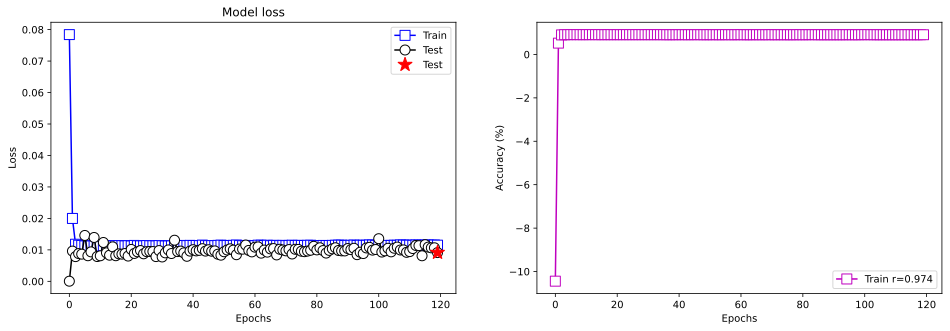

In [102]:
# fig,ax = plt.subplots(1, 2, figsize=(16, 5))

# # ax[0].plot(smooth(trainLoss))
# # ax[0].plot(smooth(testLoss))
# ax[0].plot(trainLoss, 'sb-', markerfacecolor='w', markersize=10, label='Train')
# ax[0].plot(testLoss, 'ko-', markerfacecolor='w', markersize=10, label='Test')
# ax[0].plot(len(testLoss) - 1, testLoss[-1], 'r*', markersize=15, label='Test')

# ax[0].set_xlabel('Epochs')
# ax[0].set_ylabel('Loss')
# ax[0].set_title('Model loss')
# ax[0].legend()



# ax[1].plot(trainAcc, 'ms-', markerfacecolor='w', markersize=10, label='Train')
# # ax[1].plot(testAcc, 'mo-', markerfacecolor='m', markersize=10, label='Test')
# # ax[1].plot(len(testAcc) - 1, testAcc[-1], 'r*', markersize=15, label='Test')

# ax[1].set_xlabel('Epochs')
# ax[1].set_ylabel('Accuracy (%)')
# # ax[1].set_title(f'Final model test accuracy: {testAcc[-1]:0.2f}%')
# # ax[1].set_title(f'Final model test accuracy: {testAcc[-1]:0.2f}%, r={np.corrcoef(yy.T, yHat_test.detach().T) [0,1]:0.2f}')

# # correlations between predictions and outputs
# corrTrain = np.corrcoef(yHat.detach().T, y.T) [1,0]
# # corrTest  = np.corrcoef(yHat_test.detach().T, yy.T) [1,0]

# # ax[1].legend([ f'Train r={corrTrain:0.3f}', f'Test r={corrTest:0.3f}' ])
# ax[1].legend([ f'Train r={corrTrain:0.3f}'])

# # ax[1].legend()

# # plt.ylim([0,1])
# # plt.xlim([-10,10]) # note: this actually clips two data points

# plt.show()

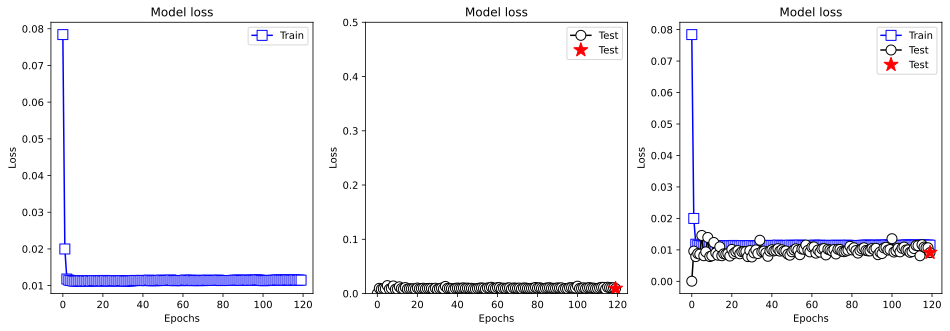

In [165]:
fig,ax = plt.subplots(1, 3, figsize=(16, 5))

# ax[0].plot(smooth(trainLoss))
# ax[0].plot(smooth(testLoss))
ax[0].plot(trainLoss, 'sb-', markerfacecolor='w', markersize=10, label='Train')

ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Model loss')
ax[0].legend()



ax[1].plot(testLoss, 'ko-', markerfacecolor='w', markersize=10, label='Test')
ax[1].plot(len(testLoss) - 1, testLoss[-1], 'r*', markersize=15, label='Test')

ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_title('Model loss')
ax[1].set_ylim([0, 0.5])
ax[1].legend()



ax[2].plot(trainLoss, 'sb-', markerfacecolor='w', markersize=10, label='Train')
ax[2].plot(testLoss, 'ko-', markerfacecolor='w', markersize=10, label='Test')
ax[2].plot(len(testLoss) - 1, testLoss[-1], 'r*', markersize=15, label='Test')

ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Loss')
ax[2].set_title('Model loss')
ax[2].legend()




# plt.ylim([0,1])
# plt.xlim([-10,10]) # note: this actually clips two data points

plt.show()

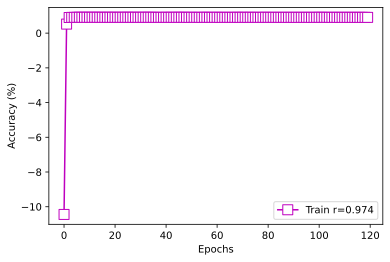

In [161]:
plt.plot(trainAcc, 'ms-', markerfacecolor='w', markersize=10, label='Train')

plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')

# correlations between predictions and outputs
corrTrain = np.corrcoef(yHat.detach().T, y.T) [1,0]

plt.legend([ f'Train r={corrTrain:0.3f}'])

plt.show()

In [103]:
data.leap_year.value_counts()

0    110960
1     35502
Name: leap_year, dtype: int64

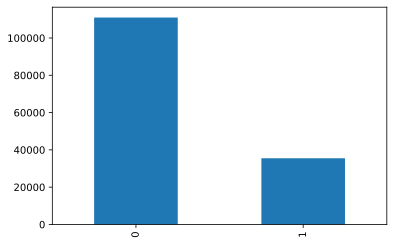

In [104]:
data.leap_year.value_counts().plot(kind="bar")

In [105]:
resampler = SMOTE(k_neighbors=20, random_state=0)

In [106]:
X_res, y_res = resampler.fit_resample(data[['day_code', 'month_code', 'decade', 'date_int']], data['leap_year'])

In [107]:
y_res.value_counts()

0    110960
1    110960
Name: leap_year, dtype: int64

In [108]:
data['leap_year'].value_counts()

0    110960
1     35502
Name: leap_year, dtype: int64

In [109]:
data

day  month  leap_year  decade       date  date_int  date_normalized  \
0       [WED]  [JAN]          0     180 1800-01-01  18000101         0.818141   
1       [THU]  [JAN]          0     180 1801-01-01  18010101         0.818595   
2       [FRI]  [JAN]          0     180 1802-01-01  18020101         0.819050   
3       [SAT]  [JAN]          0     180 1803-01-01  18030101         0.819504   
4       [SUN]  [JAN]          1     180 1804-01-01  18040101         0.819959   
...       ...    ...        ...     ...        ...       ...              ...   
146457  [SAT]  [DEC]          1     219 2196-12-31  21961231         0.998182   
146458  [SUN]  [DEC]          0     219 2197-12-31  21971231         0.998636   
146459  [MON]  [DEC]          0     219 2198-12-31  21981231         0.999091   
146460  [TUE]  [DEC]          0     219 2199-12-31  21991231         0.999545   
146461  [WED]  [DEC]          0     220 2200-12-31  22001231         1.000000   

        day_code  day_scaled   day_sin   day_cos  month_code  month_scaled  \
0              4        0.25 -0.433884 -0.900969           0     -1.000000   
1              5        0.50 -0.974928 -0.222521           0     -1.000000   
2              6        0.75 -0.781831  0.623490           0     -1.000000   
3              0       -0.75  0.000000  1.000000           0     -1.000000   
4              1       -0.50  0.781831  0.623490           0     -1.000000   
...          ...         ...       ...       ...         ...           ...   
146457         0       -0.75  0.000000  1.000000          11      0.833333   
146458         1       -0.50  0.781831  0.623490          11      0.833333   
146459         2       -0.25  0.974928 -0.222521          11      0.833333   
146460         3        0.00  0.433884 -0.900969          11      0.833333   
146461         4        0.25 -0.433884 -0.900969          11      0.833333   

        month_sin  month_cos  decade_scaled  decade_sin  decade_cos  
0             0.0   1.000000          -1.00    0.636242   -0.771489  
1             0.0   1.000000          -1.00    0.636242   -0.771489  
2             0.0   1.000000          -1.00    0.636242   -0.771489  
3             0.0   1.000000          -1.00    0.636242   -0.771489  
4             0.0   1.000000          -1.00    0.636242   -0.771489  
...           ...        ...            ...         ...         ...  
146457       -0.5   0.866025           0.95    0.839365   -0.543568  
146458       -0.5   0.866025           0.95    0.839365   -0.543568  
146459       -0.5   0.866025           0.95    0.839365   -0.543568  
146460       -0.5   0.866025           0.95    0.839365   -0.543568  
146461       -0.5   0.866025           1.00    0.746553   -0.665326  

[146462 rows x 18 columns]

In [110]:
y_res

0         0
1         0
2         0
3         0
4         1
         ..
221915    1
221916    1
221917    1
221918    1
221919    1
Name: leap_year, Length: 221920, dtype: int64

In [111]:
X_res

day_code  month_code  decade  date_int
0              4           0     180  18000101
1              5           0     180  18010101
2              6           0     180  18020101
3              0           0     180  18030101
4              1           0     180  18040101
...          ...         ...     ...       ...
221915         0           5     188  18880618
221916         2           6     188  18840705
221917         5           2     218  21800323
221918         1           5     199  19960602
221919         1           4     219  21960520

[221920 rows x 4 columns]

In [112]:
X_smote = X_res.assign(leap_year=y_res)

In [113]:
X_smote

day_code  month_code  decade  date_int  leap_year
0              4           0     180  18000101          0
1              5           0     180  18010101          0
2              6           0     180  18020101          0
3              0           0     180  18030101          0
4              1           0     180  18040101          1
...          ...         ...     ...       ...        ...
221915         0           5     188  18880618          1
221916         2           6     188  18840705          1
221917         5           2     218  21800323          1
221918         1           5     199  19960602          1
221919         1           4     219  21960520          1

[221920 rows x 5 columns]

Drop 220 decade

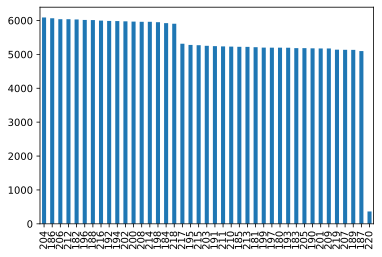

In [114]:
# data.decade.value_counts().plot(kind="bar")
X_smote.decade.value_counts().plot(kind="bar")

In [115]:
# data.decade.value_counts()[-5:]
X_smote.decade.value_counts()[-5:]

219    5139
207    5134
189    5133
187    5098
220     365
Name: decade, dtype: int64

In [116]:
X_smote = X_smote.drop(X_smote.index[X_smote['decade'] == 220]).reset_index(drop=True)
X_smote

day_code  month_code  decade  date_int  leap_year
0              4           0     180  18000101          0
1              5           0     180  18010101          0
2              6           0     180  18020101          0
3              0           0     180  18030101          0
4              1           0     180  18040101          1
...          ...         ...     ...       ...        ...
221550         0           5     188  18880618          1
221551         2           6     188  18840705          1
221552         5           2     218  21800323          1
221553         1           5     199  19960602          1
221554         1           4     219  21960520          1

[221555 rows x 5 columns]

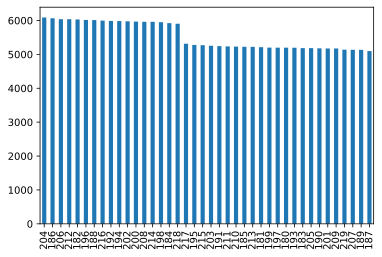

In [117]:
X_smote.decade.value_counts().plot(kind="bar")

In [118]:
X_smote.decade.value_counts()[-5:]

209    5174
219    5139
207    5134
189    5133
187    5098
Name: decade, dtype: int64

code is required to only work for dates in the range  [ 1-1-1800 to 31-12-2200 ]

In [119]:
X_smote.date_int.max()

21991231

In [120]:
datetime.datetime.strptime(str(X_smote.date_int.max()), '%Y%m%d').strftime('%d-%m-%Y')

'31-12-2199'

In [121]:
X_smote.date_int.min()

18000101

In [122]:
datetime.datetime.strptime(str(X_smote.date_int.min()), '%Y%m%d').strftime('%d-%m-%Y')

'01-01-1800'

In [123]:
Y_smote = X_smote['date_int']
Y_smote

0         18000101
1         18010101
2         18020101
3         18030101
4         18040101
            ...   
221550    18880618
221551    18840705
221552    21800323
221553    19960602
221554    21960520
Name: date_int, Length: 221555, dtype: int64

In [124]:
X_smote = X_smote.drop('date_int', axis=1).reset_index(drop=True)
X_smote

day_code  month_code  decade  leap_year
0              4           0     180          0
1              5           0     180          0
2              6           0     180          0
3              0           0     180          0
4              1           0     180          1
...          ...         ...     ...        ...
221550         0           5     188          1
221551         2           6     188          1
221552         5           2     218          1
221553         1           5     199          1
221554         1           4     219          1

[221555 rows x 4 columns]

In [125]:
Y_smote = Y_smote.reset_index(drop=True)
date_max_smote = Y_smote.max()
Y_smote /= date_max_smote
Y_smote

0         0.818513
1         0.818967
2         0.819422
3         0.819877
4         0.820332
            ...   
221550    0.858552
221551    0.856737
221552    0.991319
221553    0.907662
221554    0.998603
Name: date_int, Length: 221555, dtype: float64

In [126]:
# data.index[data['leap_year'] == 1].tolist()
# data.index[data['leap_year'] == 1]

In [127]:
# for i,idx in enumerate(data['leap_year'].tolist()):
#     print(i, idx)

0 0
1 0
2 0
3 0
4 1 <---
5 0
6 0
7 0
8 1 <---
9 0
10 0
11 0
12 1 <---
13 0
14 0
15 0
16 1 <---
17 0
18 0
19 0
20 1 <---
21 0
22 0
23 0
24 1 <---
25 0
26 0
27 0
28 1 <---
29 0
30 0

In [128]:
scaler_day_smote = RobustScaler()

x = X_smote.day_code.values.reshape(-1, 1)

X_smote['day_scaled'] = scaler_day_smote.fit_transform(x).flatten()


In [129]:
X_smote['day_sin'] = np.sin(X_smote['day_code'] * (2 * np.pi / 7))
X_smote['day_cos'] = np.cos(X_smote['day_code'] * (2 * np.pi / 7))

In [130]:
X_smote

day_code  month_code  decade  leap_year  day_scaled   day_sin  \
0              4           0     180          0    0.333333 -0.433884   
1              5           0     180          0    0.666667 -0.974928   
2              6           0     180          0    1.000000 -0.781831   
3              0           0     180          0   -1.000000  0.000000   
4              1           0     180          1   -0.666667  0.781831   
...          ...         ...     ...        ...         ...       ...   
221550         0           5     188          1   -1.000000  0.000000   
221551         2           6     188          1   -0.333333  0.974928   
221552         5           2     218          1    0.666667 -0.974928   
221553         1           5     199          1   -0.666667  0.781831   
221554         1           4     219          1   -0.666667  0.781831   

         day_cos  
0      -0.900969  
1      -0.222521  
2       0.623490  
3       1.000000  
4       0.623490  
...          ...  
221550  1.000000  
221551 -0.222521  
221552 -0.222521  
221553  0.623490  
221554  0.623490  

[221555 rows x 7 columns]

In [131]:
scaler_month_smote = RobustScaler()

x = X_smote.month_code.values.reshape(-1, 1)

X_smote['month_scaled'] = scaler_month_smote.fit_transform(x).flatten()


In [132]:
X_smote['month_sin'] = np.sin(X_smote['month_code'] * (2 * np.pi / 12))
X_smote['month_cos'] = np.cos(X_smote['month_code'] * (2 * np.pi / 12))

In [133]:
X_smote

day_code  month_code  decade  leap_year  day_scaled   day_sin  \
0              4           0     180          0    0.333333 -0.433884   
1              5           0     180          0    0.666667 -0.974928   
2              6           0     180          0    1.000000 -0.781831   
3              0           0     180          0   -1.000000  0.000000   
4              1           0     180          1   -0.666667  0.781831   
...          ...         ...     ...        ...         ...       ...   
221550         0           5     188          1   -1.000000  0.000000   
221551         2           6     188          1   -0.333333  0.974928   
221552         5           2     218          1    0.666667 -0.974928   
221553         1           5     199          1   -0.666667  0.781831   
221554         1           4     219          1   -0.666667  0.781831   

         day_cos  month_scaled     month_sin  month_cos  
0      -0.900969     -1.000000  0.000000e+00   1.000000  
1      -0.222521     -1.000000  0.000000e+00   1.000000  
2       0.623490     -1.000000  0.000000e+00   1.000000  
3       1.000000     -1.000000  0.000000e+00   1.000000  
4       0.623490     -1.000000  0.000000e+00   1.000000  
...          ...           ...           ...        ...  
221550  1.000000     -0.166667  5.000000e-01  -0.866025  
221551 -0.222521      0.000000  1.224647e-16  -1.000000  
221552 -0.222521     -0.666667  8.660254e-01   0.500000  
221553  0.623490     -0.166667  5.000000e-01  -0.866025  
221554  0.623490     -0.333333  8.660254e-01  -0.500000  

[221555 rows x 10 columns]

In [134]:
scaler_decade_smote = RobustScaler()

x = X_smote.decade.values.reshape(-1, 1)

X_smote['decade_scaled'] = scaler_decade_smote.fit_transform(x).flatten()


In [135]:
# alpha_smote = len(X_smote.decade.unique())
alpha_smote = (X_smote.decade.iloc[-1] - X_smote.decade.iloc[0]) + 1

X_smote['decade_sin'] = np.sin(X_smote['decade'] * (2 * np.pi / alpha_smote))
X_smote['decade_cos'] = np.cos(X_smote['decade'] * (2 * np.pi / alpha_smote))

In [136]:
X_smote

day_code  month_code  decade  leap_year  day_scaled   day_sin  \
0              4           0     180          0    0.333333 -0.433884   
1              5           0     180          0    0.666667 -0.974928   
2              6           0     180          0    1.000000 -0.781831   
3              0           0     180          0   -1.000000  0.000000   
4              1           0     180          1   -0.666667  0.781831   
...          ...         ...     ...        ...         ...       ...   
221550         0           5     188          1   -1.000000  0.000000   
221551         2           6     188          1   -0.333333  0.974928   
221552         5           2     218          1    0.666667 -0.974928   
221553         1           5     199          1   -0.666667  0.781831   
221554         1           4     219          1   -0.666667  0.781831   

         day_cos  month_scaled     month_sin  month_cos  decade_scaled  \
0      -0.900969     -1.000000  0.000000e+00   1.000000      -1.052632   
1      -0.222521     -1.000000  0.000000e+00   1.000000      -1.052632   
2       0.623490     -1.000000  0.000000e+00   1.000000      -1.052632   
3       1.000000     -1.000000  0.000000e+00   1.000000      -1.052632   
4       0.623490     -1.000000  0.000000e+00   1.000000      -1.052632   
...          ...           ...           ...        ...            ...   
221550  1.000000     -0.166667  5.000000e-01  -0.866025      -0.631579   
221551 -0.222521      0.000000  1.224647e-16  -1.000000      -0.631579   
221552 -0.222521     -0.666667  8.660254e-01   0.500000       0.947368   
221553  0.623490     -0.166667  5.000000e-01  -0.866025      -0.052632   
221554  0.623490     -0.333333  8.660254e-01  -0.500000       1.000000   

          decade_sin  decade_cos  
0       1.102182e-15   -1.000000  
1       1.102182e-15   -1.000000  
2       1.102182e-15   -1.000000  
3       1.102182e-15   -1.000000  
4       1.102182e-15   -1.000000  
...              ...         ...  
221550 -9.510565e-01   -0.309017  
221551 -9.510565e-01   -0.309017  
221552  3.090170e-01   -0.951057  
221553 -1.564345e-01    0.987688  
221554  1.564345e-01   -0.987688  

[221555 rows x 13 columns]

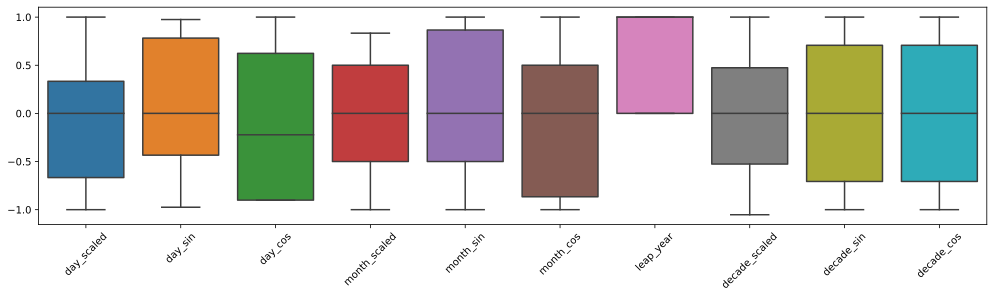

In [199]:
fig,ax = plt.subplots(1,figsize=(17,4))

ax = sns.boxplot(data=X_smote[['day_scaled', 'day_sin', 'day_cos', 'month_scaled', 'month_sin', 'month_cos', 
          'leap_year', 'decade_scaled', 'decade_sin', 'decade_cos']])

ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

In [138]:
X = X_smote[['day_scaled', 'day_sin', 'day_cos', 'month_scaled', 'month_sin', 'month_cos', 
             'leap_year', 'decade_scaled', 'decade_sin', 'decade_cos']].values
X

array([[ 3.33333333e-01, -4.33883739e-01, -9.00968868e-01, ...,
        -1.05263158e+00,  1.10218212e-15, -1.00000000e+00],
       [ 6.66666667e-01, -9.74927912e-01, -2.22520934e-01, ...,
        -1.05263158e+00,  1.10218212e-15, -1.00000000e+00],
       [ 1.00000000e+00, -7.81831482e-01,  6.23489802e-01, ...,
        -1.05263158e+00,  1.10218212e-15, -1.00000000e+00],
       ...,
       [ 6.66666667e-01, -9.74927912e-01, -2.22520934e-01, ...,
         9.47368421e-01,  3.09016994e-01, -9.51056516e-01],
       [-6.66666667e-01,  7.81831482e-01,  6.23489802e-01, ...,
        -5.26315789e-02, -1.56434465e-01,  9.87688341e-01],
       [-6.66666667e-01,  7.81831482e-01,  6.23489802e-01, ...,
         1.00000000e+00,  1.56434465e-01, -9.87688341e-01]])

In [139]:
X.shape

(221555, 10)

In [140]:
# Y = data['date_int'].values.reshape(-1, 1)
# Y = np.log(data['date_int'].values.reshape(-1, 1))
# Y = data['date_int'].values.reshape(-1, 1) / data['date_int'].max()
# Y = data['date_normalized'].values.reshape(-1, 1)
Y = Y_smote.values.reshape(-1, 1)


Y

array([[0.81851266],
       [0.81896739],
       [0.81942211],
       ...,
       [0.9913189 ],
       [0.90766188],
       [0.99860349]])

In [149]:
Y.shape

(221555, 1)

In [150]:
train_data, test_data, train_labels, test_labels = train_test_split(X, Y, test_size=0.3, shuffle=True,
                                                                    random_state=0)

In [151]:
train_dataT = TensorDataset( torch.tensor(train_data).float(), torch.tensor(train_labels).float() )

test_dataT  = TensorDataset( torch.tensor(test_data).float(), torch.tensor(test_labels).float() )



batchsize = 32
# batchsize = 64

train_loader = DataLoader(train_dataT, batch_size=batchsize, drop_last=True)

test_loader  = DataLoader(test_dataT)


In [166]:
print(f'X: {X.shape}\n')
print(f'Y: {Y.shape}\n')

print(f'Train data:   {train_data.shape}\n')
print(f'Train labels: {train_labels.shape}\n')
print(f'Test data:    {test_data.shape}\n')
print(f'Test labels:  {test_labels.shape}')

X: (221555, 10)

Y: (221555, 1)

Train data:   (155088, 10)

Train labels: (155088, 1)

Test data:    (66467, 10)

Test labels:  (66467, 1)


In [167]:
model_smote = Model().to(device)

In [168]:
numepochs = 120

trainLoss, testLoss, trainAcc, yHat, y, yHat_test, yy = train(model_smote, numepochs)


Epoch 1/120, Train Loss: 0.003787, Test Loss: 0.003787
Epoch 2/120, Train Loss: 0.005415, Test Loss: 0.005415
Epoch 3/120, Train Loss: 0.003646, Test Loss: 0.003646
Epoch 4/120, Train Loss: 0.005388, Test Loss: 0.005388
Epoch 5/120, Train Loss: 0.009869, Test Loss: 0.009869
Epoch 6/120, Train Loss: 0.010611, Test Loss: 0.010611
Epoch 7/120, Train Loss: 0.003962, Test Loss: 0.003962
Epoch 8/120, Train Loss: 0.006606, Test Loss: 0.006606
Epoch 9/120, Train Loss: 0.003934, Test Loss: 0.003934
Epoch 10/120, Train Loss: 0.003599, Test Loss: 0.003599
Epoch 11/120, Train Loss: 0.004491, Test Loss: 0.004491
Epoch 12/120, Train Loss: 0.007758, Test Loss: 0.007758
Epoch 13/120, Train Loss: 0.001353, Test Loss: 0.001353
Epoch 14/120, Train Loss: 0.001895, Test Loss: 0.001895
Epoch 15/120, Train Loss: 0.004150, Test Loss: 0.004150
Epoch 16/120, Train Loss: 0.005459, Test Loss: 0.005459
Epoch 17/120, Train Loss: 0.005825, Test Loss: 0.005825
Epoch 18/120, Train Loss: 0.003988, Test Loss: 0.003988
E

In [169]:
trainLoss, testLoss, trainAcc

(tensor([0.0533, 0.0121, 0.0116, 0.0114, 0.0114, 0.0114, 0.0114, 0.0113, 0.0113,
         0.0113, 0.0113, 0.0114, 0.0113, 0.0113, 0.0113, 0.0113, 0.0113, 0.0113,
         0.0113, 0.0114, 0.0114, 0.0113, 0.0113, 0.0113, 0.0114, 0.0114, 0.0114,
         0.0114, 0.0114, 0.0113, 0.0114, 0.0114, 0.0114, 0.0114, 0.0114, 0.0114,
         0.0114, 0.0114, 0.0114, 0.0114, 0.0114, 0.0114, 0.0114, 0.0114, 0.0114,
         0.0115, 0.0114, 0.0113, 0.0114, 0.0114, 0.0114, 0.0114, 0.0115, 0.0114,
         0.0114, 0.0114, 0.0115, 0.0115, 0.0114, 0.0114, 0.0114, 0.0114, 0.0114,
         0.0115, 0.0115, 0.0114, 0.0115, 0.0115, 0.0115, 0.0114, 0.0114, 0.0113,
         0.0114, 0.0115, 0.0114, 0.0115, 0.0114, 0.0114, 0.0114, 0.0114, 0.0114,
         0.0115, 0.0114, 0.0115, 0.0115, 0.0115, 0.0114, 0.0114, 0.0115, 0.0115,
         0.0115, 0.0115, 0.0115, 0.0114, 0.0115, 0.0114, 0.0115, 0.0116, 0.0115,
         0.0114, 0.0114, 0.0115, 0.0115, 0.0115, 0.0115, 0.0115, 0.0115, 0.0115,
         0.0115, 0.0115, 0.0

In [170]:
(yy * data['date_int'].max()).round()

tensor([[19109516.]])

In [171]:
(yHat_test * data['date_int'].max()).round()

tensor([[19161270.]])

In [172]:
print_score(X.shape, yHat, y, yHat_test, yy)

Adjusted R-Squared(y, yHat): 0.8998


mean_absolute_error(y, yHat): 0.0122

mean_absolute_error(yy, yHat_test): 0.0024


mean_squared_error(y, yHat): 0.0003

mean_squared_error(yy, yHat_test): 0.0000


mean_squared_log_error(y, yHat): 0.0001

mean_squared_log_error(yy, yHat_test): 0.0000


RMSE(y, yHat): 0.0179

RMSE(yy, yHat_test): 0.0024




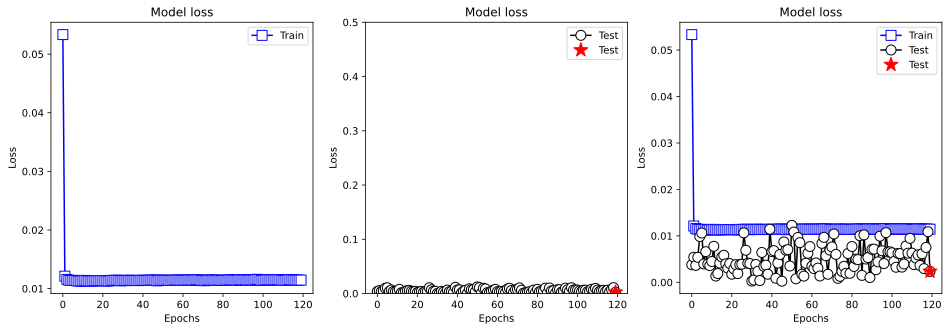

In [173]:
fig,ax = plt.subplots(1, 3, figsize=(16, 5))

# ax[0].plot(smooth(trainLoss))
# ax[0].plot(smooth(testLoss))
ax[0].plot(trainLoss, 'sb-', markerfacecolor='w', markersize=10, label='Train')

ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Model loss')
ax[0].legend()



ax[1].plot(testLoss, 'ko-', markerfacecolor='w', markersize=10, label='Test')
ax[1].plot(len(testLoss) - 1, testLoss[-1], 'r*', markersize=15, label='Test')

ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_title('Model loss')
ax[1].set_ylim([0, 0.5])
ax[1].legend()



ax[2].plot(trainLoss, 'sb-', markerfacecolor='w', markersize=10, label='Train')
ax[2].plot(testLoss, 'ko-', markerfacecolor='w', markersize=10, label='Test')
ax[2].plot(len(testLoss) - 1, testLoss[-1], 'r*', markersize=15, label='Test')

ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Loss')
ax[2].set_title('Model loss')
ax[2].legend()




# plt.ylim([0,1])
# plt.xlim([-10,10]) # note: this actually clips two data points

plt.show()

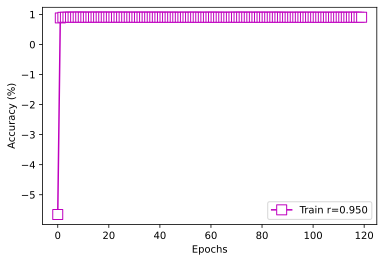

In [174]:
plt.plot(trainAcc, 'ms-', markerfacecolor='w', markersize=10, label='Train')

plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')

# correlations between predictions and outputs
corrTrain = np.corrcoef(yHat.detach().T, y.T) [1,0]

plt.legend([ f'Train r={corrTrain:0.3f}'])

plt.show()

In [175]:
['day_scaled', 'day_sin', 'day_cos', 'month_scaled', 'month_sin', 'month_cos', 
             'leap_year', 'decade_scaled', 'decade_sin', 'decade_cos']

['day_scaled',
 'day_sin',
 'day_cos',
 'month_scaled',
 'month_sin',
 'month_cos',
 'leap_year',
 'decade_scaled',
 'decade_sin',
 'decade_cos']

In [176]:
def result_to_date(result):
    
    result = str(result)
    
    day   = int(result[6:]) - 1
    month = int(result[4:6]) - 1

    ss = str(f'{result[:4]}0101')
    
    ds = datetime.datetime.strptime(ss, '%Y%m%d')
    
    ds = ds + relativedelta(months=month, days=day)

    result = ds.strftime('%d-%m-%Y')
    
    
    return result

In [177]:
# (16830739, 17848869)
result_to_date(16830739), result_to_date(17848869)

('08-08-1683', '08-06-1791')

In [178]:
def test_model(input_list):
    

    X       = np.zeros((1, 10))
    X_smote = np.zeros((1, 10))



    day       = np.array(map_day[input_list[0]])
    month     = np.array(map_month[input_list[1]])
    leap_year = map_leap_year[input_list[2]]
    decade    = np.array(input_list[3].strip('[]')).astype('int64')


    X[0, 0] = scaler_day.transform(day.reshape(-1, 1)).flatten()
    X[0, 1] = np.sin(day * (2 * np.pi / 7))
    X[0, 2] = np.cos(day * (2 * np.pi / 7))

    X[0, 3] = scaler_month.transform(month.reshape(-1, 1)).flatten()
    X[0, 4] = np.sin(month * (2 * np.pi / 12))
    X[0, 5] = np.cos(month * (2 * np.pi / 12))

    X[0, 6] = leap_year

    X[0, 7] = scaler_decade.transform(decade.reshape(-1, 1)).flatten()
    X[0, 8] = np.sin(decade * (2 * np.pi / alpha))
    X[0, 9] = np.cos(decade * (2 * np.pi / alpha))

    # ---

    X_smote[0, 0] = scaler_day_smote.transform(day.reshape(-1, 1)).flatten()
    X_smote[0, 1] = X[0, 1]
    X_smote[0, 2] = X[0, 2]

    X_smote[0, 3] = scaler_month_smote.transform(month.reshape(-1, 1)).flatten()
    X_smote[0, 4] = X[0, 4]
    X_smote[0, 5] = X[0, 5]

    X_smote[0, 6] = leap_year

    X_smote[0, 7] = scaler_decade_smote.transform(decade.reshape(-1, 1)).flatten()
    X_smote[0, 8] = np.sin(decade * (2 * np.pi / alpha_smote))
    X_smote[0, 9] = np.cos(decade * (2 * np.pi / alpha_smote))


    # ---

    result       = model(torch.tensor(X).to(device).float())
    result_smote = model_smote(torch.tensor(X_smote).to(device).float())


    # ---

    result       = round(result.detach().cpu().numpy().item() * date_max)
    result_smote = round(result_smote.detach().cpu().numpy().item() * date_max_smote)

    
    return result_to_date(result), result_to_date(result_smote)




In [179]:
input_test1 = ['[MON]', '[DEC]', '[False]', '[196]']
output_test1 = '3-12-1962'

input_test2 = ['[THU]', '[DEC]', '[True]', '[204]']
output_test2 = '3-12-2048'

input_test3 = ['[WED]', '[JAN]', '[False]', '[181]']
output_test3 = '10-1-1810'


input_test4 = ['[WED]', '[JUN]', '[False]', '[209]']



In [180]:
test_model(input_test1), test_model(input_test2), test_model(input_test3), test_model(input_test4)

(('07-12-1969', '26-12-1988'),
 ('08-03-2050', '04-10-2057'),
 ('07-07-1837', '23-06-1849'),
 ('18-12-2089', '01-06-2099'))

In [181]:
output_test1, output_test2, output_test3

('3-12-1962', '3-12-2048', '10-1-1810')

In [182]:
# example_input = pd.read_csv('./data/example_input.txt', sep=' ', header=None)
example_input = pd.read_csv('example_input.txt', sep=' ', header=None)


example_input.columns = ['day', 'month', 'leap_year', 'decade']


In [183]:
example_input

day  month leap_year decade
0     [WED]  [JAN]   [False]  [180]
1     [MON]  [JAN]   [False]  [190]
2     [SAT]  [JAN]    [True]  [200]
3     [FRI]  [JAN]   [False]  [210]
4     [WED]  [JAN]   [False]  [220]
...     ...    ...       ...    ...
1460  [MON]  [OCT]    [True]  [214]
1461  [TUE]  [DEC]   [False]  [183]
1462  [SUN]  [DEC]   [False]  [193]
1463  [SAT]  [DEC]   [False]  [203]
1464  [THU]  [DEC]   [False]  [213]

[1465 rows x 4 columns]

In [187]:
R = pd.DataFrame(np.nan, index=np.arange(len(example_input)), columns=['result'])
R_smote = pd.DataFrame(np.nan, index=np.arange(len(example_input)), columns=['result_smote'])

In [188]:
example_input.iloc[0].tolist()

['[WED]', '[JAN]', '[False]', '[180]']

In [189]:
for i in range(len(example_input)):
    R.iloc[i], R_smote.iloc[i] = test_model(example_input.iloc[i].tolist())

In [190]:
R

result
0     07-07-1837
1     22-03-1914
2     04-10-2014
3     07-04-2096
4     22-01-2155
...          ...
1460  26-08-2141
1461  07-07-1837
1462  18-10-1926
1463  17-02-2049
1464  17-02-2134

[1465 rows x 1 columns]

In [191]:
final = pd.concat([example_input, R], axis=1)
final

day  month leap_year decade      result
0     [WED]  [JAN]   [False]  [180]  07-07-1837
1     [MON]  [JAN]   [False]  [190]  22-03-1914
2     [SAT]  [JAN]    [True]  [200]  04-10-2014
3     [FRI]  [JAN]   [False]  [210]  07-04-2096
4     [WED]  [JAN]   [False]  [220]  22-01-2155
...     ...    ...       ...    ...         ...
1460  [MON]  [OCT]    [True]  [214]  26-08-2141
1461  [TUE]  [DEC]   [False]  [183]  07-07-1837
1462  [SUN]  [DEC]   [False]  [193]  18-10-1926
1463  [SAT]  [DEC]   [False]  [203]  17-02-2049
1464  [THU]  [DEC]   [False]  [213]  17-02-2134

[1465 rows x 5 columns]

In [192]:
final_smote = pd.concat([example_input, R_smote], axis=1)
final_smote

day  month leap_year decade result_smote
0     [WED]  [JAN]   [False]  [180]   23-06-1849
1     [MON]  [JAN]   [False]  [190]   16-10-1913
2     [SAT]  [JAN]    [True]  [200]   30-09-2028
3     [FRI]  [JAN]   [False]  [210]   16-04-2137
4     [WED]  [JAN]   [False]  [220]   08-07-2203
...     ...    ...       ...    ...          ...
1460  [MON]  [OCT]    [True]  [214]   26-08-2179
1461  [TUE]  [DEC]   [False]  [183]   23-06-1849
1462  [SUN]  [DEC]   [False]  [193]   23-09-1951
1463  [SAT]  [DEC]   [False]  [203]   07-03-2044
1464  [THU]  [DEC]   [False]  [213]   09-03-2159

[1465 rows x 5 columns]

In [193]:
final.to_csv('output_file.txt', sep=' ', header=None, index=False)

In [194]:
final_smote.to_csv('output_file_smote.txt', sep=' ', header=None, index=False)

Out-liers

Saving

In [198]:
checkpoint = {'model_state_dict'      : model.state_dict(),
              'model_smote_state_dict': model_smote.state_dict()}


torch.save(checkpoint, 'checkpoint.pth.tar')



In [196]:
# checkpoint = torch.load('checkpoint.pth.tar')

In [197]:

# model       = Model()
# model_smote = Model()


# model.load_state_dict(checkpoint['model_state_dict'])
# model_smote.load_state_dict(checkpoint['model_smote_state_dict'])

